In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
path = '/content/archive (16).zip'

data = pd.read_csv(path)
data.head(20)

id  age  gender  income  spending_score  membership_years  \
0    1   38  Female   99342              90                 3   
1    2   21  Female   78852              60                 2   
2    3   60  Female  126573              30                 2   
3    4   40   Other   47099              74                 9   
4    5   65  Female  140621              21                 3   
5    6   31   Other   57305              24                 3   
6    7   19   Other   54319              68                 5   
7    8   43    Male  108115              94                 9   
8    9   53    Male   34424              29                 6   
9   10   55  Female   45839              55                 7   
10  11   23   Other   69659              16                 7   
11  12   68   Other   30058              91                 1   
12  13   29  Female   87461              81                 3   
13  14   64   Other   33018              46                 4   
14  15   33    Male  112260              17                 5   
15  16   53    Male  129284              17                 6   
16  17   57    Male  102535              29                 5   
17  18   22    Male   41849              22                 1   
18  19   37    Male   95491              90                 6   
19  20   31    Male   97103              70                 3   

    purchase_frequency preferred_category  last_purchase_amount  
0                   24          Groceries                113.53  
1                   42             Sports                 41.93  
2                   28           Clothing                424.36  
3                    5      Home & Garden                991.93  
4                   25        Electronics                347.08  
5                   30      Home & Garden                 86.85  
6                   43           Clothing                191.72  
7                   27          Groceries                734.56  
8                    7             Sports                951.71  
9                    2        Electronics                821.18  
10                  24           Clothing                434.97  
11                  49          Groceries                889.94  
12                  27      Home & Garden                101.07  
13                   3             Sports                221.35  
14                   8      Home & Garden                915.89  
15                  26           Clothing                225.40  
16                  13           Clothing                378.47  
17                  31             Sports                844.08  
18                  21      Home & Garden                454.83  
19                  17          Groceries                 61.30

In [ ]:
data.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [ ]:
data.describe()

id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500  
50%             5.00000           27.000000            491.595000  
75%             8.00000           39.000000            747.170000  
max            10.00000           50.000000            999.740000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
data.duplicated().sum()

np.int64(0)

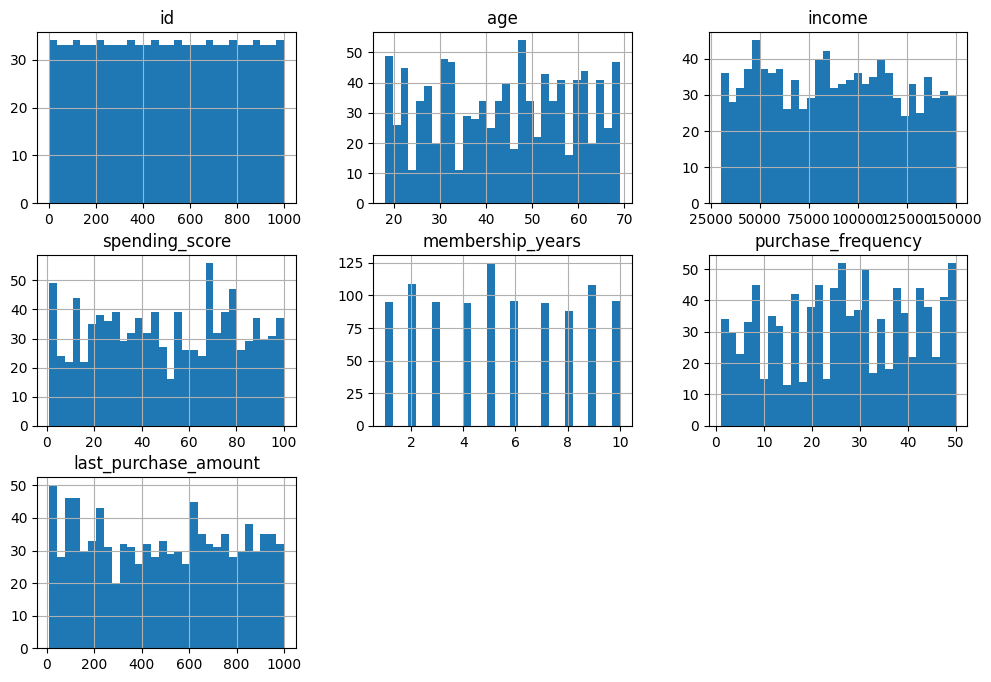

In [ ]:
data.hist(figsize=(12,8), bins=30)
plt.show()

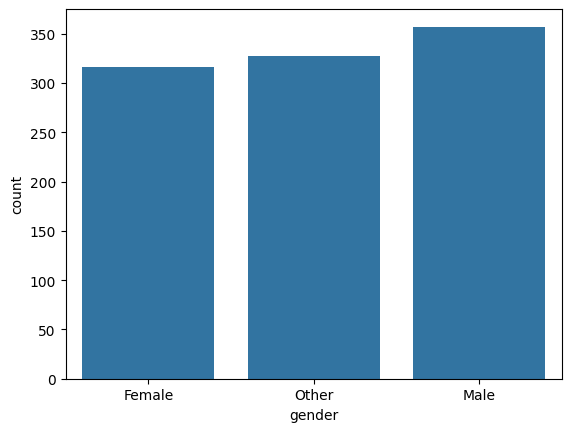

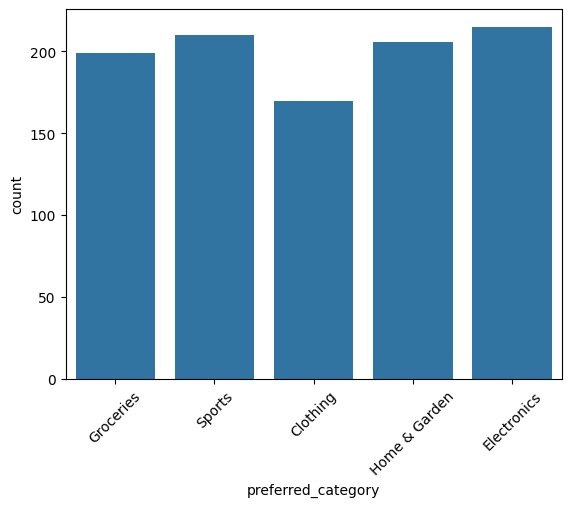

In [ ]:
sns.countplot(x='gender', data=data)
plt.show()

sns.countplot(x='preferred_category', data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(f"Duplicate Rows: {data.duplicated().sum()}")

data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")


Duplicate Rows: 0
Data after removing duplicates: (1000, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()


id       age  gender    income  spending_score  membership_years  \
0   1 -0.384644  Female  0.316868        1.358468         -0.865010   
1   2 -1.515362  Female -0.282016        0.321865         -1.215358   
2   3  1.078639  Female  1.112778       -0.714738         -1.215358   
3   4 -0.251618   Other -1.210096        0.805613          1.237080   
4   5  1.411203  Female  1.523374       -1.025718         -0.865010   

   purchase_frequency preferred_category  last_purchase_amount  
0           -0.182348          Groceries             -1.281540  
1            1.082005             Sports             -1.523763  
2            0.098620           Clothing             -0.230005  
3           -1.516943      Home & Garden              1.690080  
4           -0.112106        Electronics             -0.491443

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data = pd.get_dummies(data, columns=['preferred_category'], drop_first=True)
data.head()

id       age  gender    income  spending_score  membership_years  \
0   1 -0.384644       0  0.316868        1.358468         -0.865010   
1   2 -1.515362       0 -0.282016        0.321865         -1.215358   
2   3  1.078639       0  1.112778       -0.714738         -1.215358   
3   4 -0.251618       2 -1.210096        0.805613          1.237080   
4   5  1.411203       0  1.523374       -1.025718         -0.865010   

   purchase_frequency  last_purchase_amount  preferred_category_Electronics  \
0           -0.182348             -1.281540                           False   
1            1.082005             -1.523763                           False   
2            0.098620             -0.230005                           False   
3           -1.516943              1.690080                           False   
4           -0.112106             -0.491443                            True   

   preferred_category_Groceries  preferred_category_Home & Garden  \
0                          True                             False   
1                         False                             False   
2                         False                             False   
3                         False                              True   
4                         False                             False   

   preferred_category_Sports  
0                      False  
1                       True  
2                      False  
3                      False  
4                      False

In [ ]:
from sklearn.cluster import KMeans

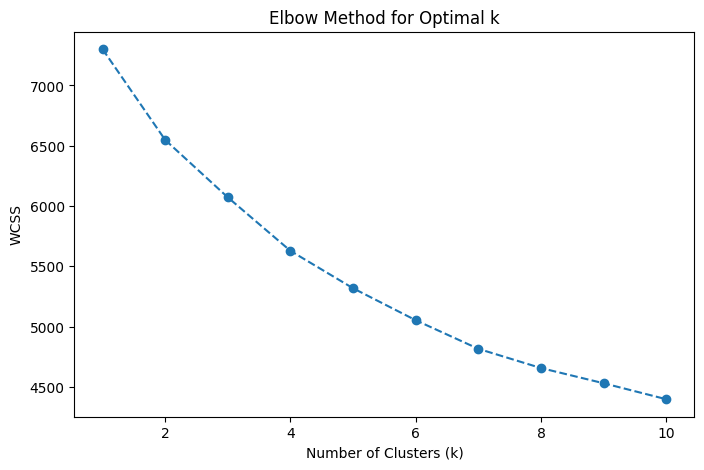

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data.drop(columns=['id']))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data.drop(columns=['id']))
data.head()

id       age  gender    income  spending_score  membership_years  \
0   1 -0.384644       0  0.316868        1.358468         -0.865010   
1   2 -1.515362       0 -0.282016        0.321865         -1.215358   
2   3  1.078639       0  1.112778       -0.714738         -1.215358   
3   4 -0.251618       2 -1.210096        0.805613          1.237080   
4   5  1.411203       0  1.523374       -1.025718         -0.865010   

   purchase_frequency  last_purchase_amount  preferred_category_Electronics  \
0           -0.182348             -1.281540                           False   
1            1.082005             -1.523763                           False   
2            0.098620             -0.230005                           False   
3           -1.516943              1.690080                           False   
4           -0.112106             -0.491443                            True   

   preferred_category_Groceries  preferred_category_Home & Garden  \
0                          True                             False   
1                         False                             False   
2                         False                             False   
3                         False                              True   
4                         False                             False   

   preferred_category_Sports  Cluster  
0                      False        2  
1                       True        2  
2                      False        1  
3                      False        0  
4                      False        1

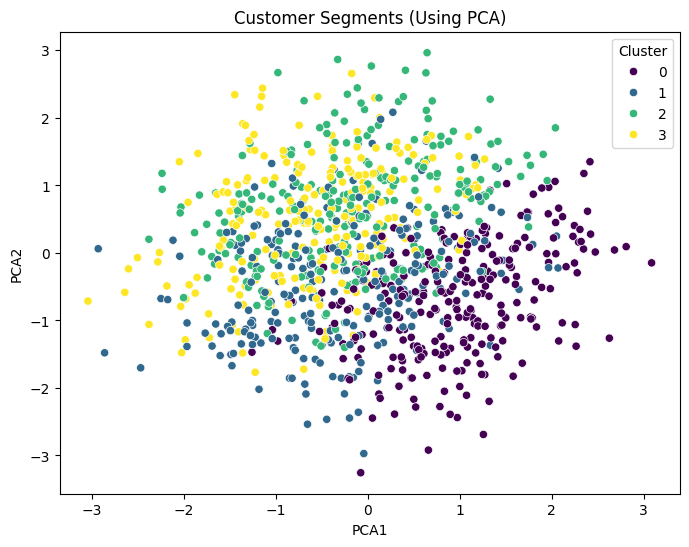

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.drop(columns=['id', 'Cluster']))
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='viridis')
plt.title("Customer Segments (Using PCA)")
plt.show()


In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

                 id       age    gender    income  spending_score  \
Cluster                                                             
0        519.923954  0.528833  1.228137 -0.921561       -0.288272   
1        506.732794  0.850018  0.979757  0.967397        0.144202   
2        475.929961 -0.530351  0.817121 -0.367062        0.901072   
3        499.068670 -0.913036  1.012876  0.419564       -0.821364   

         membership_years  purchase_frequency  last_purchase_amount  \
Cluster                                                               
0                0.042166           -0.061895              0.662243   
1               -0.111832           -0.084521             -0.019838   
2                0.068798           -0.012346             -0.531390   
3               -0.004927            0.173082             -0.140354   

         preferred_category_Electronics  preferred_category_Groceries  \
Cluster                                                                 
0           

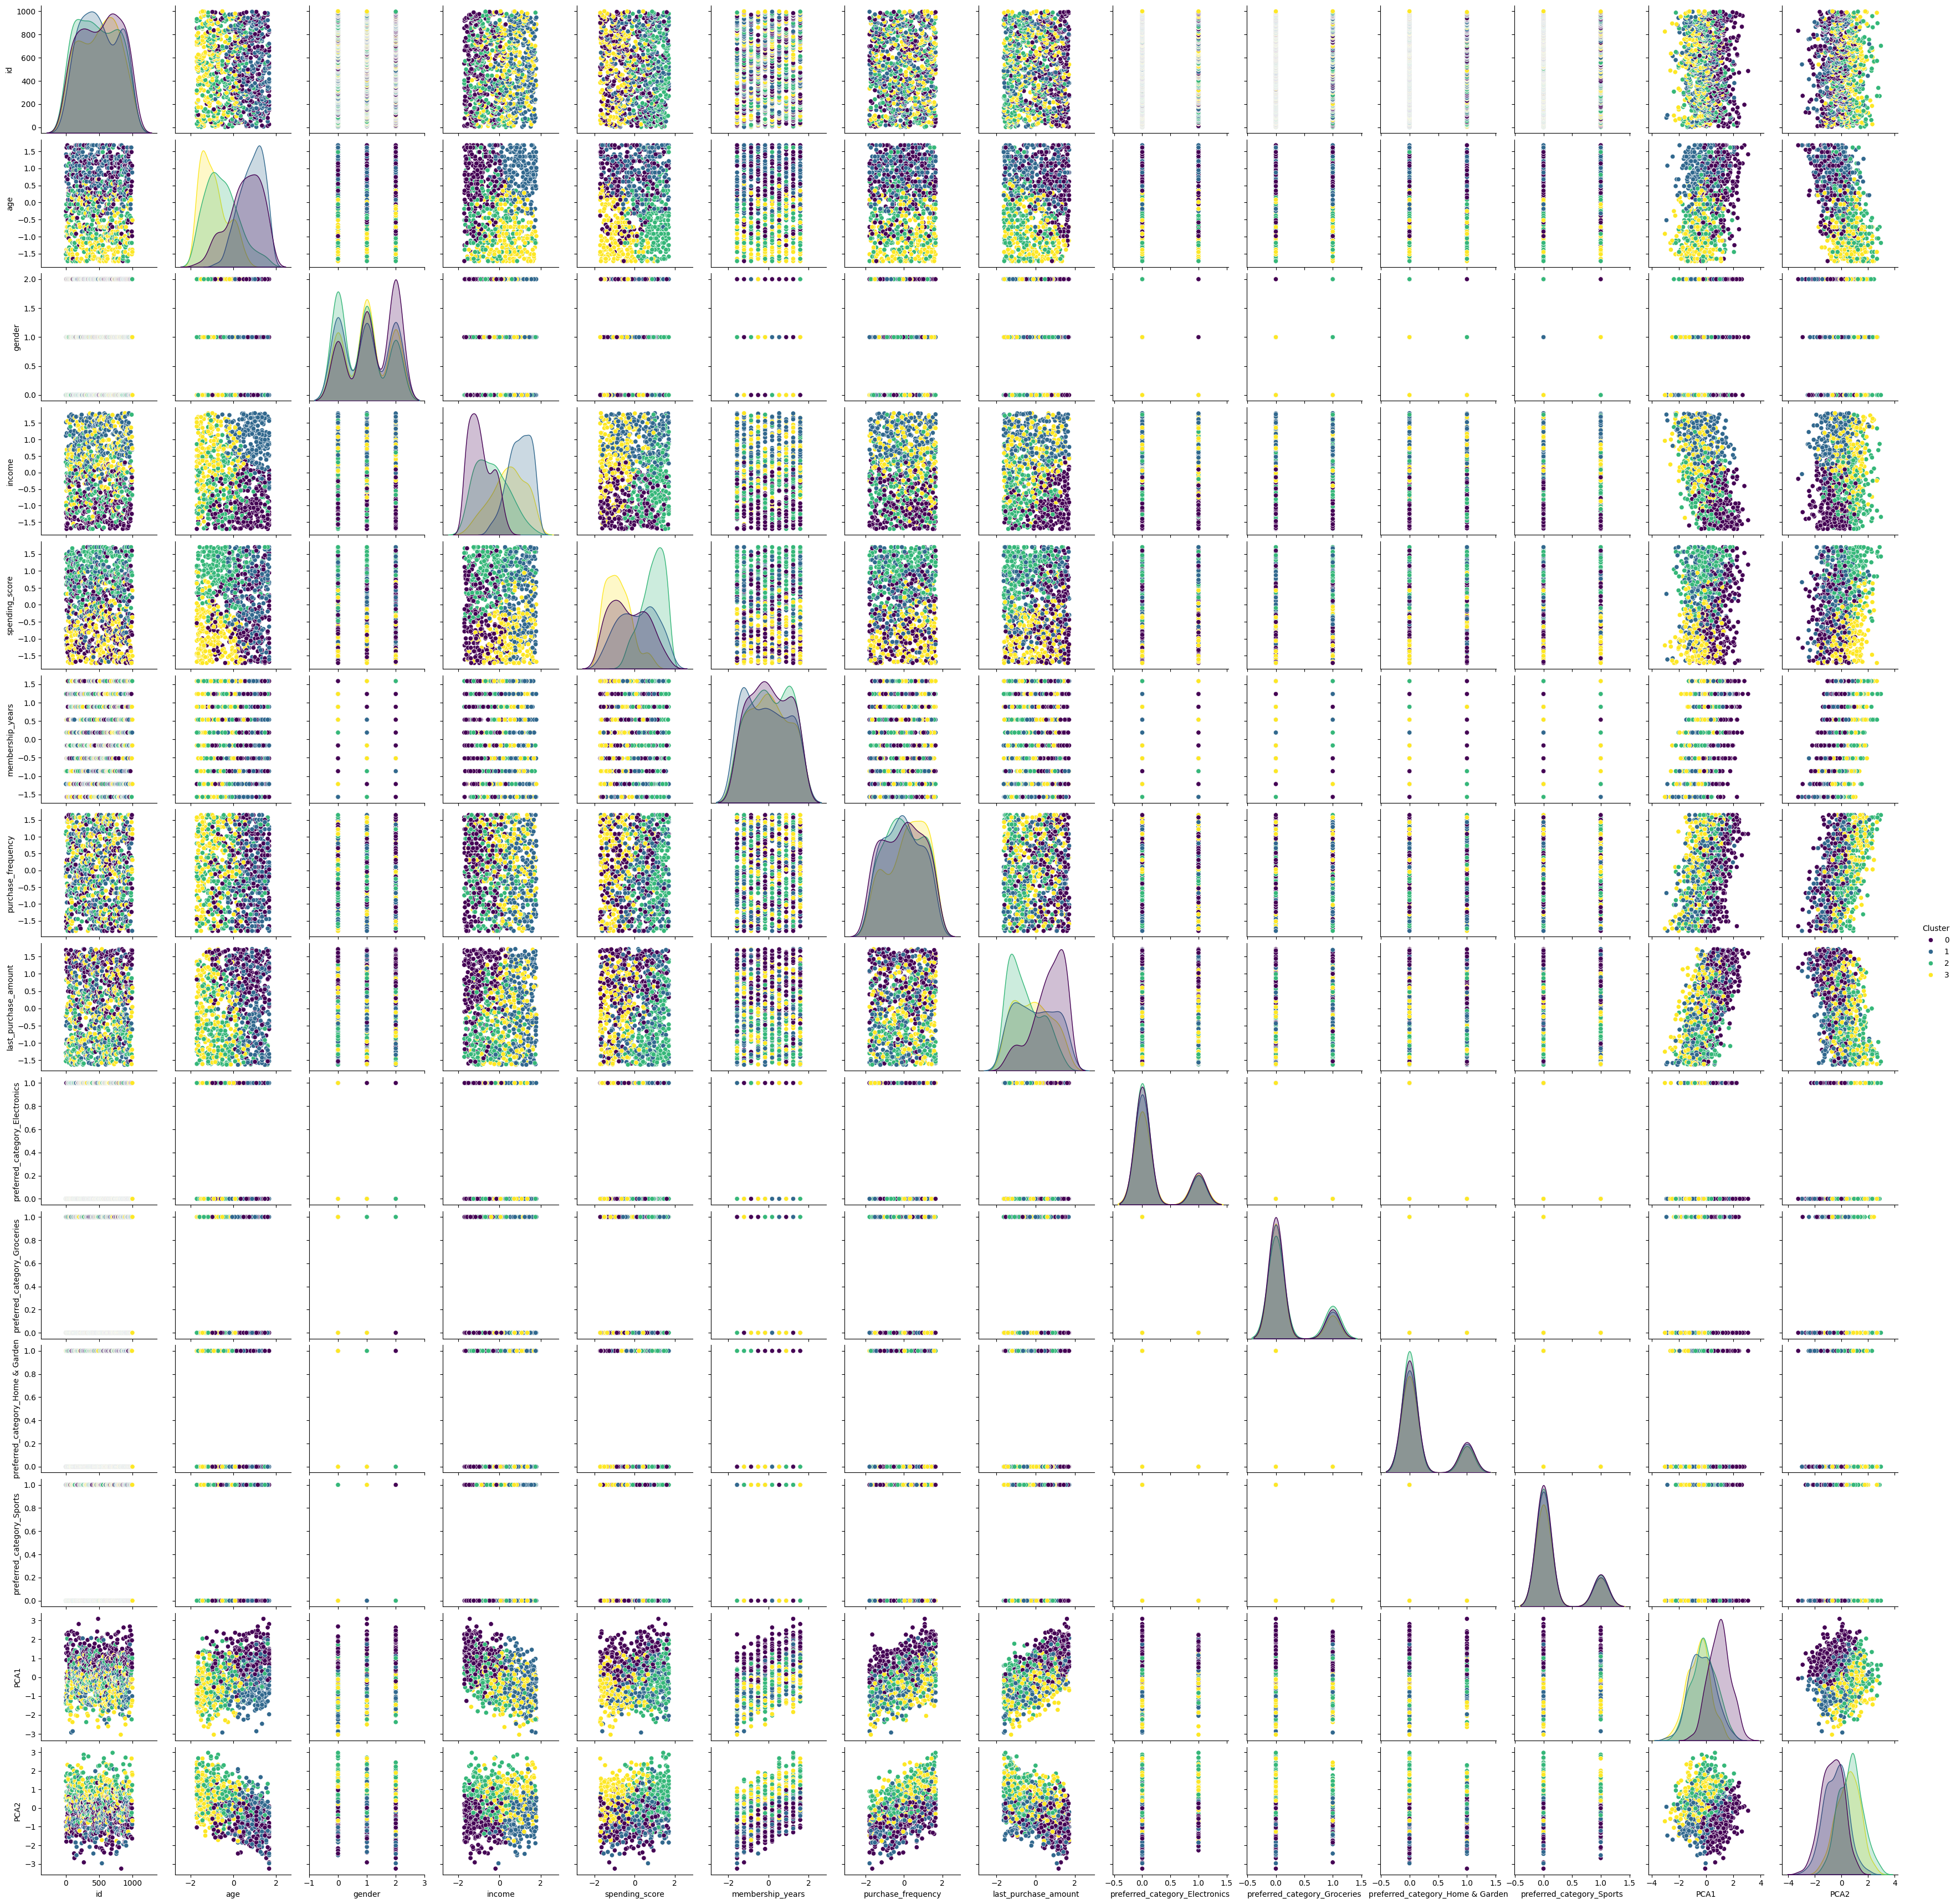

In [ ]:
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

<ipython-input-20-b93cc33a1e1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Cluster'], y=data['spending_score'], palette='viridis')


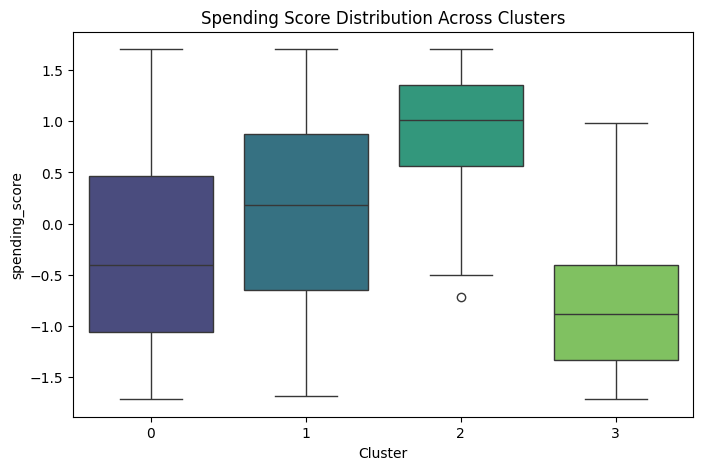

<ipython-input-20-b93cc33a1e1f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Cluster'], y=data['income'], palette='plasma')


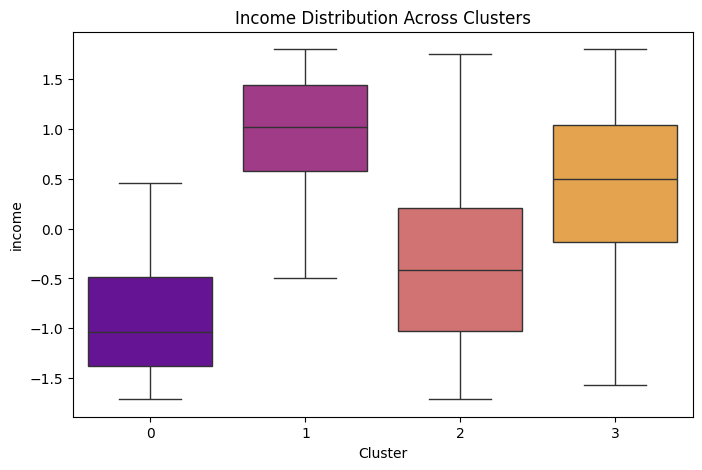

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Cluster'], y=data['spending_score'], palette='viridis')
plt.title('Spending Score Distribution Across Clusters')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Cluster'], y=data['income'], palette='plasma')
plt.title('Income Distribution Across Clusters')
plt.show()

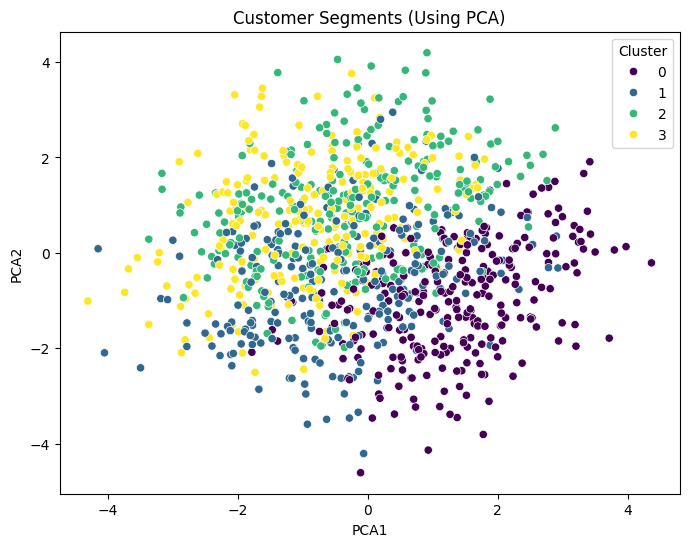

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.drop(columns=['id', 'Cluster']))
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='viridis')
plt.title("Customer Segments (Using PCA)")
plt.show()